In [1]:
import os
import gnssrefl.gps as g
import gnssrefl.rinex2snr as rnx
import gnssrefl.quickLook_function as quick
import gnssrefl.gnssir as guts

import check_parameters


%matplotlib inline

In [2]:
# Setting up environment variables
# will check if already set. If not, then create them inside this working directory
try:
  %env 'ORBITS'
except:
    orbits_dir = os.getcwd() + '/orbits'
    %set_env ORBITS $orbits_dir
    pass

try:
  %env 'EXE'
except:
    exe_dir = os.getcwd() + '/exe'
    %set_env EXE $exe_dir
    pass

try:
  %env 'REFL_CODE'
except:
    refl_code_dir = os.getcwd()
    %set_env REFL_CODE $refl_code_dir
    pass

env: ORBITS=/Users/enloe/UNAVCO_Projects/git/gnssrefl_jupyter/orbits
env: EXE=/Users/enloe/UNAVCO_Projects/git/gnssrefl_jupyter/exe
env: REFL_CODE=/Users/enloe/UNAVCO_Projects/git/gnssrefl_jupyter


In [3]:
print(os.environ['ORBITS'])
print(os.environ['EXE'])
print(os.environ['REFL_CODE'])

/Users/enloe/UNAVCO_Projects/git/gnssrefl_jupyter/orbits
/Users/enloe/UNAVCO_Projects/git/gnssrefl_jupyter/exe
/Users/enloe/UNAVCO_Projects/git/gnssrefl_jupyter


In [4]:
# making sure that env variables are set - if they are then None
g.check_environ_variables()

In [5]:
# params
station = 'p041'
year = 2020
doy = 151

# extra params needed for gnssir
lat = 39.949
long = -105.194
height = 1728.856 # (meters) ellipsoidal height

# RINEX2SNR

In [23]:
# see the parameters and default values
check_parameters.rinex2snr?

In [8]:
#place code here that clears files?

# Check that all the parameters are 
args = check_parameters.rinex2snr(station,year,doy)
#args['station'] = str(station)
rnx.run_rinex2snr(**args)

making year directory
making nav specific directory
making sp3 specific directory
Will seek RINEX file  p041  year: 2020  doy: 151  and translate with  python


SUCCESS: SNR file was created: /Users/enloe/UNAVCO_Projects/git/gnssrefl_jupyter/2020/snr/p041/p0411510.20.snr66


# QuickLook

In [ ]:
#place any extra arguments wanted here

In [ ]:
# see the parameters and default values
check_parameters.quicklook?

minimum elevation angle (degrees) for this dataset:  0.0002
preliminary reflector height results are stored in a file called logs/rh.txt


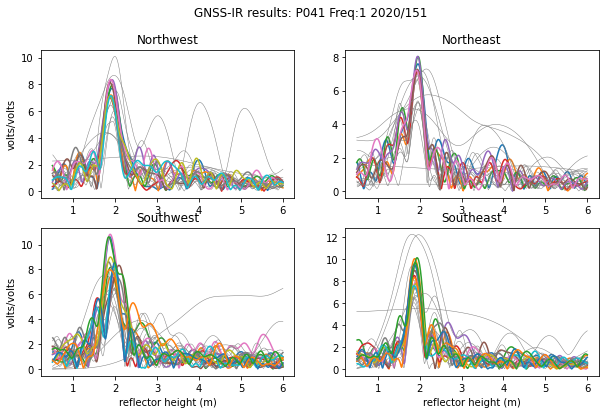

In [9]:
args = check_parameters.quicklook(station, year, doy=doy)
quick.quickLook_function(**args)

# GNSSIR

## make json

In [ ]:
# see the parameters and default values
check_parameters.make_json?

In [10]:
check_parameters.make_json(station, lat, long, height)

writing out to: /Users/enloe/UNAVCO_Projects/git/gnssrefl_jupyter/input/p041.json


## run GNSSIR

In [ ]:
# see the parameters and default values
check_parameters.gnssir?

[151]
A station specific refraction output file will be written to  /Users/enloe/UNAVCO_Projects/git/gnssrefl_jupyter/input/p041_refr.txt
The large refraction file should be stored here: /Users/enloe/UNAVCO_Projects/git/gnssrefl_jupyter/input/gpt_1wA.pickle
I did not find it, I will look in current working directory
hmm, failed again. ... try yet again here: 
/Users/enloe/UNAVCO_Projects/env/gnssrefl_git/lib/python3.6/site-packages/gnssrefl/gpt_1wA.pickle
station specific refraction file written
Results are written to: /Users/enloe/UNAVCO_Projects/git/gnssrefl_jupyter/2020/results/p041//151.txt
reading from this snr file  /Users/enloe/UNAVCO_Projects/git/gnssrefl_jupyter/2020/snr/p041/p0411510.20.snr66


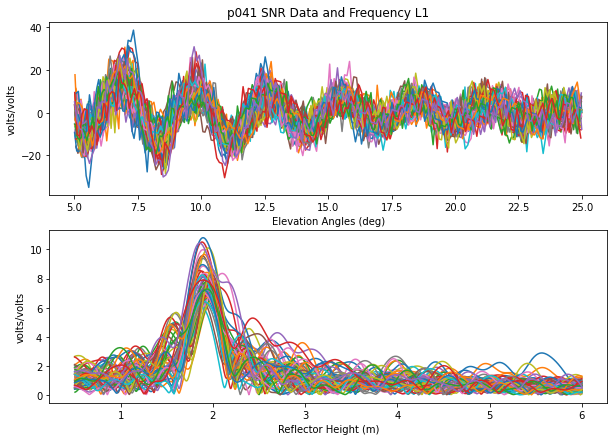

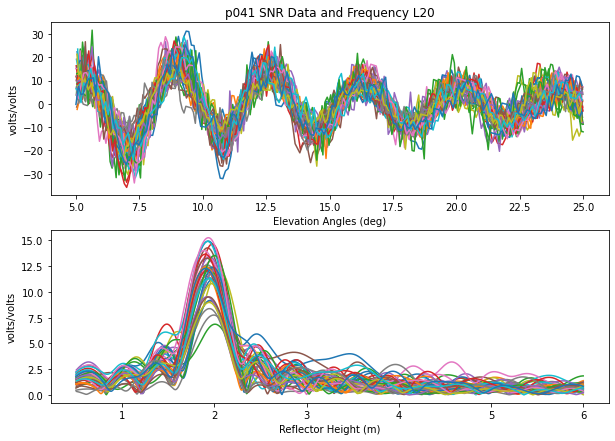

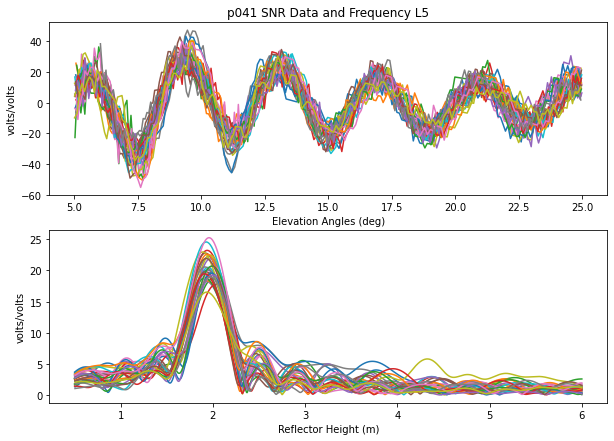

In [11]:
args = check_parameters.gnssir(station, year, doy=doy, plt=True, screenstats=False)

year_list = list(range(year, args['year_end'] + 1))
doy_list = list(range(doy, args['doy_end'] + 1))
print(doy_list)
for year in year_list:
    for doy in doy_list:
        guts.gnssir_guts(**args['args'])